# Objective:

Analyze Airbnb Paris listings to uncover patterns in pricing, availability, and neighborhood trends.

Questions to be answered:
 1. Which neighborhoods are the most expensive or most reviewed?
 2. How does the number of reviews relate to price or availability?
 3. What types of properties are most popular in different areas?

In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the Data from csv file
df = pd.read_csv('../data/airbnb_paris.csv')
df_raw = df.copy()

In [3]:
#Basic Overview of dataset
print('Total Number of Rows,Columns:',df_raw.shape)
print('Column List:',df_raw.columns.to_list())

Total Number of Rows,Columns: (84055, 79)
Column List: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availabilit

In [4]:
df_raw.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20250606142312,2025-06-20,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.08
1,5396,https://www.airbnb.com/rooms/5396,20250606142312,2025-06-19,city scrape,Your perfect Paris studio on Île Saint-Louis,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.85,4.95,4.59,7510402838018,f,1,1,0,0,2.32
2,7397,https://www.airbnb.com/rooms/7397,20250606142312,2025-06-20,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.89,4.94,4.74,7510400829623,f,1,1,0,0,2.20
3,7964,https://www.airbnb.com/rooms/7964,20250606142312,2025-06-18,previous scrape,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22155,...,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.03
4,9359,https://www.airbnb.com/rooms/9359,20250606142312,2025-06-18,city scrape,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,https://a0.muscache.com/pictures/c2965945-061f...,28422,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN


In [5]:
#Fetch information on columns
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84055 entries, 0 to 84054
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            84055 non-null  int64  
 1   listing_url                                   84055 non-null  object 
 2   scrape_id                                     84055 non-null  int64  
 3   last_scraped                                  84055 non-null  object 
 4   source                                        84055 non-null  object 
 5   name                                          84055 non-null  object 
 6   description                                   81177 non-null  object 
 7   neighborhood_overview                         41178 non-null  object 
 8   picture_url                                   84054 non-null  object 
 9   host_id                                       84055 non-null 

In [7]:
#Dropping Columns not useful for the Analysis as the columns are mostly URLs, descriptions or duplicates
#Dropping host location column as I am not analysisng host behaviour
#Not analysisng multi property host behaviour
#neighbourhood_group_cleansed since all the values are null, so droping it as it is useless for the analysis
col_drop_list = ['listing_url',
                 'scrape_id',
                 'last_scraped',
                 'host_location','host_neighbourhood',
                 'host_listings_count','host_total_listings_count','neighbourhood',
                 'neighbourhood_group_cleansed',
                 'source',
                 'name',
                 'description',
                 'neighborhood_overview',
                 'picture_url',
                 'host_id',
                 'host_url',
                 'host_name',
                'host_since',
                'host_about',
                 'host_response_time',
                 'host_response_rate',
                 'host_acceptance_rate',
                 'host_is_superhost',
                 'host_thumbnail_url',
                 'host_picture_url',
                'host_verifications',
                 'host_has_profile_pic',
                 'host_identity_verified',
                 'amenities',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
  'property_type',
   'has_availability',
'calendar_last_scraped',
   'first_review',
 'last_review',
 'license',
 'instant_bookable',            
   'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']
df_raw.drop(columns=col_drop_list,inplace=True)
print('Total Number of Remaining columns:',df_raw.shape[1])

Total Number of Remaining columns: 31


In [8]:
#Inspect missing values in Remaining Columns
df_raw.isnull().sum()

id                                 0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
room_type                          0
accommodates                       0
bathrooms                      29758
bathrooms_text                    73
bedrooms                        7137
beds                           30048
price                          30092
minimum_nights                     0
maximum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
number_of_reviews_ltm              0
number_of_reviews_l30d             0
availability_eoy                   0
number_of_reviews_ly               0
estimated_occupancy_l365d          0
estimated_revenue_l365d        30092
review_scores_rating           19557
review_scores_accuracy         19569
review_scores_cleanliness      19566
r

In [9]:
#Check for duplicate rows
df_raw[df_raw.duplicated()]

,id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,...,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value


In [10]:
#Descriptive Statistics of the dataset
df_raw.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,84055.0,NaN,NaN,NaN,634798363074343168.0,540277559181251648.0,3109.0,31505048.5,831802221536536064.0,1118821873396696576.0,1437098876993289216.0
neighbourhood_cleansed,84055,20,Buttes-Montmartre,8943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,84055.0,NaN,NaN,NaN,48.864047,0.018094,48.81589,48.850758,48.865321,48.87863,48.90167
longitude,84055.0,NaN,NaN,NaN,2.342917,0.034203,2.229896,2.32079,2.346677,2.367945,2.46836
room_type,84055,4,Entire home/apt,74532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,84055.0,NaN,NaN,NaN,3.225198,1.684463,1.0,2.0,3.0,4.0,16.0
bathrooms,54297.0,NaN,NaN,NaN,1.211503,0.555283,0.0,1.0,1.0,1.0,42.0
bathrooms_text,83982,36,1 bath,61261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,76918.0,NaN,NaN,NaN,1.343457,0.90954,0.0,1.0,1.0,2.0,41.0
beds,54007.0,NaN,NaN,NaN,1.830726,1.1903,0.0,1.0,2.0,2.0,17.0


In [11]:
#Fill Missing values for some useful fields
df_raw['bathrooms'] = df_raw['bathrooms'].fillna(df_raw['bathrooms'].median())
df_raw['bathrooms_text'] = df_raw['bathrooms_text'].fillna('unknown')
df_raw['bedrooms'] = df_raw['bedrooms'].fillna(df_raw['bedrooms'].median())
df_raw['beds'] = df_raw['beds'].fillna(df_raw['beds'].median())

In [12]:
print("Missing price rows:", df['price'].isnull().sum())
#Dropping rows with missing Price
df_raw = df_raw[df_raw['price'].notnull()]

Missing price rows: 30092


In [ ]:
#Filling Review Scores with Median
df_raw['review_scores_rating'] = df_raw['review_scores_rating'].fillna(df_raw['review_scores_rating'].median())
df_raw['review_scores_accuracy'] = df_raw['review_scores_accuracy'].fillna(df_raw['review_scores_accuracy'].median())
df_raw['review_scores_cleanliness'] = df_raw['review_scores_cleanliness'].fillna(df_raw['review_scores_cleanliness'].median())
df_raw['review_scores_checkin'] = df_raw['review_scores_checkin'].fillna(df_raw['review_scores_checkin'].median())
df_raw['review_scores_communication'] = df_raw['review_scores_communication'].fillna(df_raw['review_scores_communication'].median())
df_raw['review_scores_location'] = df_raw['review_scores_location'].fillna(df_raw['review_scores_location'].median())
df_raw['review_scores_value'] = df_raw['review_scores_value'].fillna(df_raw['review_scores_value'].median())

In [14]:
#Checking if any column still has missing values
df_raw.isnull().sum()

id                             0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
room_type                      0
accommodates                   0
bathrooms                      0
bathrooms_text                 0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
availability_eoy               0
number_of_reviews_ly           0
estimated_occupancy_l365d      0
estimated_revenue_l365d        0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_sco

In [15]:
#Descriptive analysis after Data Cleaning
df_raw.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,53963.0,NaN,NaN,NaN,767179675237781888.0,514446869680883328.0,3109.0,50420122.0,967260598815437568.0,1158597817707318016.0,1437098876993289216.0
neighbourhood_cleansed,53963,20,Buttes-Montmartre,5172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,53963.0,NaN,NaN,NaN,48.863842,0.017629,48.81589,48.85111,48.86507,48.87765,48.90159
longitude,53963.0,NaN,NaN,NaN,2.34113,0.034145,2.229896,2.31884,2.345401,2.364826,2.46836
room_type,53963,4,Entire home/apt,48706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,53963.0,NaN,NaN,NaN,3.380928,1.787897,1.0,2.0,3.0,4.0,16.0
bathrooms,53963.0,NaN,NaN,NaN,1.212794,0.556739,0.0,1.0,1.0,1.0,42.0
bathrooms_text,53963,31,1 bath,38155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,53963.0,NaN,NaN,NaN,1.325427,0.932571,0.0,1.0,1.0,2.0,33.0
beds,53963.0,NaN,NaN,NaN,1.832941,1.190057,0.0,1.0,2.0,2.0,17.0


# EDA

### Analysing Price 

In [34]:
#Convert Price column from Object to Float type for analysis

#Removing $ and , sign
df_raw['price'] = df_raw['price'].replace('[\$,]', '', regex=True)

#Convert it to float
df_raw['price'] = df_raw['price'].astype(float)

In [37]:
#Basic Price Stats
df_raw['price'].describe()

count    53963.000000
mean       285.263384
std        688.616441
min          8.000000
25%        104.000000
50%        161.000000
75%        277.000000
max      30814.000000
Name: price, dtype: float64

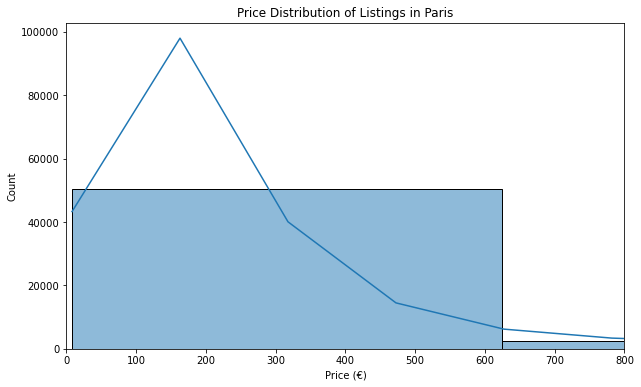

In [114]:
#Histogram of all Prices
plt.figure(figsize=(10,6))
sns.histplot(df_raw['price'], bins=50, kde=True)
plt.title('Price Distribution of Listings in Paris')
plt.xlabel('Price (€)')
plt.xlim(0, 800)  # Limit to reduce outlier effect
plt.savefig('../images/plots/Price_Distribution_Listings.png', dpi=300, bbox_inches='tight')
plt.show()

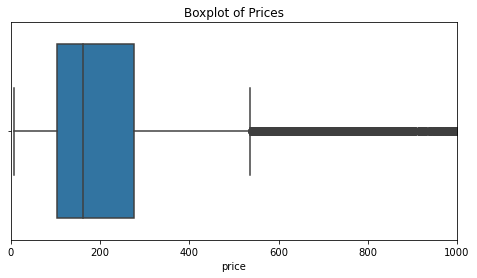

In [115]:
#Boxplot to check for outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_raw['price'])
plt.title('Boxplot of Prices')
plt.xlim(0, 1000)  # Adjust if needed
plt.savefig('../images/plots/Price_Distribution_Listings_Boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

Insights:

1. The average price is from 150 euro to 250 euro.
2. 75% of the price is around 280 euro.
3. There are outliers beyond 500 euro.

In [71]:
#Price v/s Room Type
df_raw.groupby('room_type')['price'].agg(['mean','median'])

,mean,median
room_type,,
Entire home/apt,289.198743,165.0
Hotel room,562.655702,353.5
Private room,223.264195,100.0
Shared room,70.216418,52.5


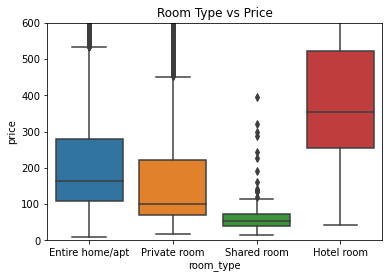

In [116]:
sns.boxplot(x='room_type', y='price', data=df_raw)
plt.ylim(0, 600)
plt.title('Room Type vs Price')
plt.savefig('../images/plots/Room_Type_Boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

Insight:

1. Hotel Room has median price beyond 300 euro.
2. Entire Home/apt and Private room median is below 170 euro with a difference of 65 euro.
3. Shared Room median is lowest and is below 55 euro but it has many outliers.

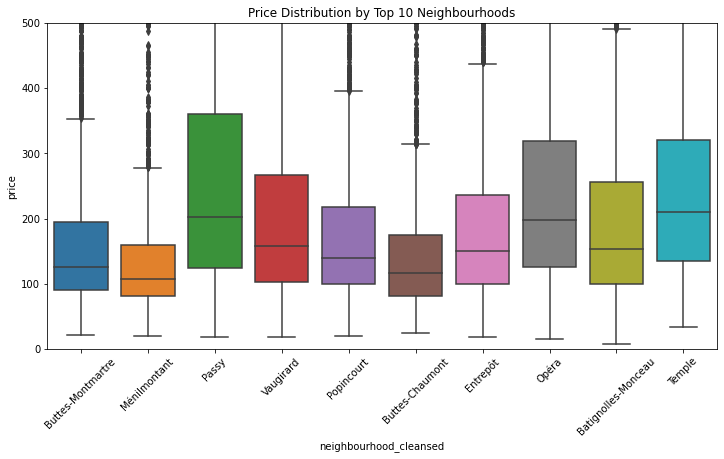

In [117]:
# Price by top 10 Neighbourhood
top_neigh = df_raw['neighbourhood_cleansed'].value_counts().head(10).index
top_df = df_raw[df_raw['neighbourhood_cleansed'].isin(top_neigh)]

plt.figure(figsize=(12,6))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=top_df)
plt.title('Price Distribution by Top 10 Neighbourhoods')
plt.xticks(rotation=45)
plt.ylim(0, 500);
plt.savefig('../images/plots/Top_10_Neighborhood_Boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


Insights:
1. Passy has the most expensive listings followed by Opera and Temple.
2. Buttes-Montmartre, Menilmontant and Buttes-Chaumont have least price of listing among the Top 10 neighbourhoods.

In [87]:
#Corealtions with Price
num_cols = [
    'price',
    'bedrooms',
    'beds',
    'bathrooms',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'availability_365'
]
corr_matrix = df_raw[num_cols].corr()
corr_matrix

,price,bedrooms,beds,bathrooms,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,availability_365
price,1.000000,0.204552,0.181449,0.234662,0.011812,0.006758,0.032127,0.010298,0.006595,0.030399,0.011350,0.099006
bedrooms,0.204552,1.000000,0.667928,0.604084,0.061748,0.042199,0.054193,0.034984,0.038285,0.028501,0.063861,0.005065
beds,0.181449,0.667928,1.000000,0.488421,0.003563,-0.013986,0.008329,-0.000838,-0.001229,0.002608,0.013135,0.020534
bathrooms,0.234662,0.604084,0.488421,1.000000,0.039002,0.023634,0.054992,0.016294,0.019183,0.036102,0.037323,0.033757
review_scores_rating,0.011812,0.061748,0.003563,0.039002,1.000000,0.845099,0.757462,0.692974,0.770926,0.559024,0.843178,-0.068120
review_scores_accuracy,0.006758,0.042199,-0.013986,0.023634,0.845099,1.000000,0.706641,0.639257,0.707869,0.539510,0.798887,-0.063414
review_scores_cleanliness,0.032127,0.054193,0.008329,0.054992,0.757462,0.706641,1.000000,0.543753,0.579380,0.468793,0.701681,-0.033114
review_scores_checkin,0.010298,0.034984,-0.000838,0.016294,0.692974,0.639257,0.543753,1.000000,0.718363,0.485899,0.622443,-0.031017
review_scores_communication,0.006595,0.038285,-0.001229,0.019183,0.770926,0.707869,0.579380,0.718363,1.000000,0.492917,0.692160,-0.050546
review_scores_location,0.030399,0.028501,0.002608,0.036102,0.559024,0.539510,0.468793,0.485899,0.492917,1.000000,0.537420,-0.015698


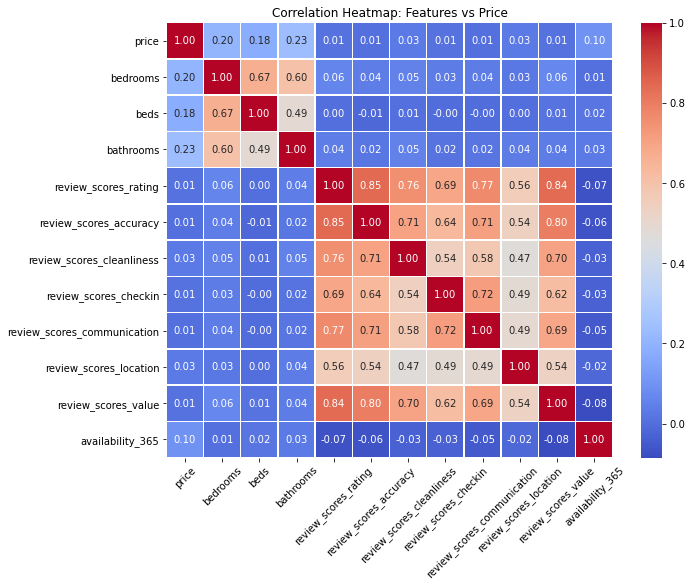

In [118]:
#Plotting the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Features vs Price')
plt.xticks(rotation=45);
plt.savefig('../images/plots/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Insights:
1. Price has weak positive correalation with review_scores.
2. Beds and Bathrooms has moderate weak correlation with Price.

### Total Number of listings in the every neighbourhood

In [25]:
df_raw['neighbourhood_cleansed'].unique().tolist()

['Observatoire',
 'Hôtel-de-Ville',
 'Louvre',
 'Buttes-Montmartre',
 'Bourse',
 'Ménilmontant',
 'Passy',
 'Élysée',
 'Panthéon',
 'Vaugirard',
 'Gobelins',
 'Popincourt',
 'Buttes-Chaumont',
 'Entrepôt',
 'Opéra',
 'Luxembourg',
 'Reuilly',
 'Palais-Bourbon',
 'Batignolles-Monceau',
 'Temple']

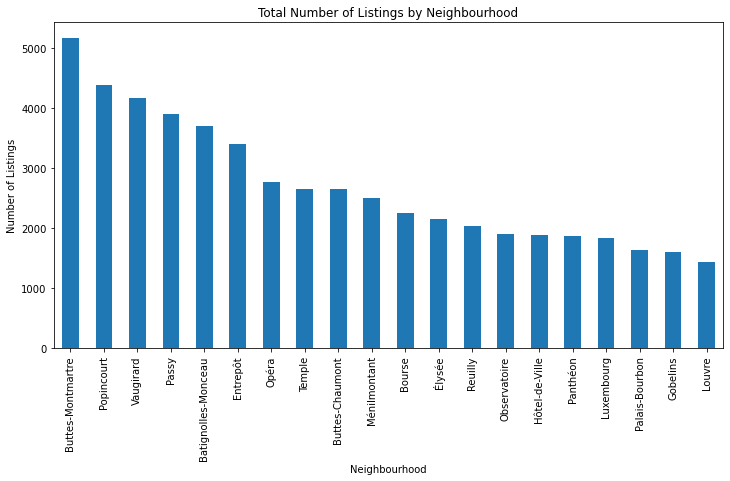

In [119]:
df_raw['neighbourhood_cleansed'].value_counts().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    title='Total Number of Listings by Neighbourhood',
    xlabel='Neighbourhood',
    ylabel='Number of Listings'
)
plt.savefig('../images/plots/neighborhood_histogram.png', dpi=300, bbox_inches='tight')
plt.show()


Insight:
1. Buttes-Montmartre has the maximum number of listings followed by Poponcourt, Vaugirard, Passy, Batignolles-Monceau etc.
2. Top 10 neighbourhood has total listing above 26000.
3. The neighbourhood with the lowest number of listings has more than 1500 listings.

In [31]:
#Total Listings by Room Type
df_raw['room_type'].unique().tolist()

['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

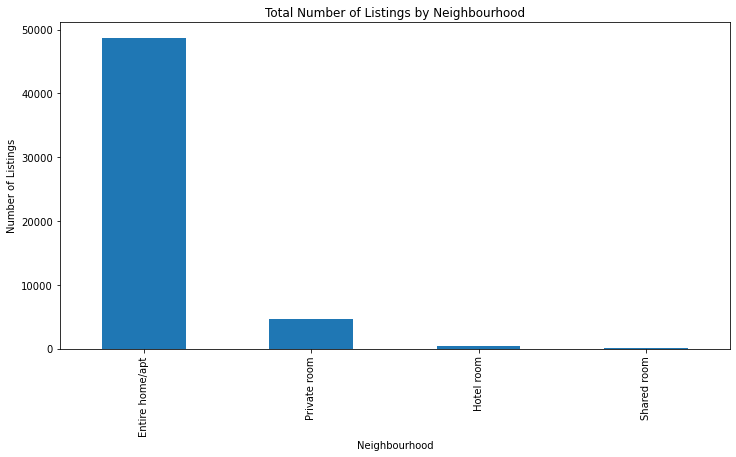

In [120]:
df_raw['room_type'].value_counts().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    title='Total Number of Listings by Neighbourhood',
    xlabel='Neighbourhood',
    ylabel='Number of Listings'
)
plt.savefig('../images/plots/Room_Type_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

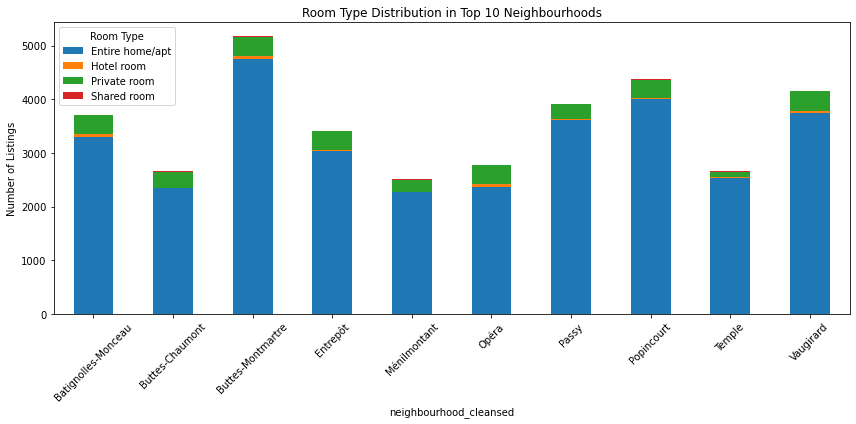

In [121]:
#Listing by Room Type in Each Neighbourhood.
top_neigh = df_raw['neighbourhood_cleansed'].value_counts().head(10).index
room_dist = df_raw[df_raw['neighbourhood_cleansed'].isin(top_neigh)] \
    .groupby(['neighbourhood_cleansed', 'room_type']) \
    .size().unstack().fillna(0)

room_dist.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Room Type Distribution in Top 10 Neighbourhoods')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.savefig('../images/plots/RoomType_vs_TopNeighborhood.png', dpi=300, bbox_inches='tight')
plt.show()

Inshights:
- Most neighborhood has Entire home/apt are more popular airbnb followed by Private Rooms.
- Few neighborhoods have 5% Shared Rooms as the listing.
- Hotel rooms are popular among 10% of the listings.

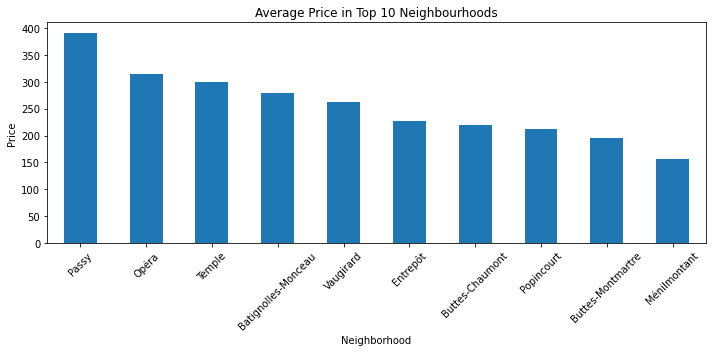

In [122]:
#Top 10 listings by Average Price per Neighborhood.
top_neigh = df_raw['neighbourhood_cleansed'].value_counts().head(10).index

df_raw[df_raw['neighbourhood_cleansed'].isin(top_neigh)] \
  .groupby('neighbourhood_cleansed')['price'] \
  .mean() \
  .sort_values(ascending=False) \
  .plot(kind='bar', figsize=(10,5), title='Average Price in Top 10 Neighbourhoods');
plt.ylabel('Price')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/plots/Avg_Price_Top_10_Neighborhood.png', dpi=300, bbox_inches='tight')
plt.show()

Inshights:
- Passy is the most expensive followed by Opera and Temple.

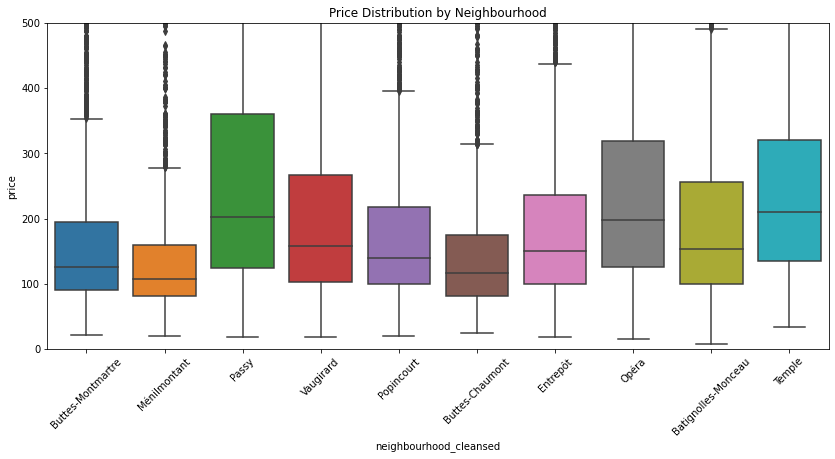

In [123]:
# Boxplot of Price by Neighborhood (to Show Range & Outliers)
plt.figure(figsize=(14,6))
sns.boxplot(data=df_raw[df_raw['neighbourhood_cleansed'].isin(top_neigh)],
            x='neighbourhood_cleansed', y='price')
plt.xticks(rotation=45)
plt.ylim(0, 500)
plt.title('Price Distribution by Neighbourhood')
plt.savefig('../images/plots/Price_vs_Neighborhood_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

Inshights:
- Passy, Opera and Temple seems to have more expensive options.
- The Popular areas have options in budget.
- The areas with Budget options have more Outliers as well.

### Bivariate analysis of bathrooms, bedrooms, accomadates and beds influence Price using Boxplot and Scatterplot.


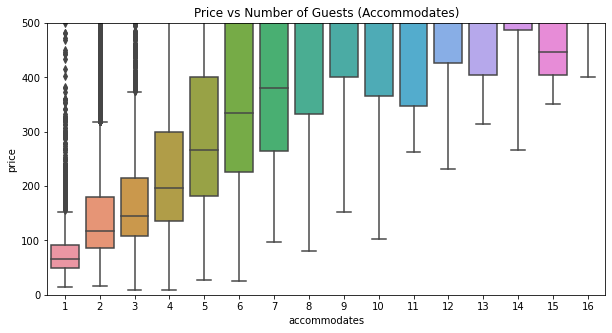

In [124]:
#Accomadates vs Price
plt.figure(figsize=(10, 5))
sns.boxplot(x='accommodates', y='price', data=df_raw)
plt.title('Price vs Number of Guests (Accommodates)')
plt.ylim(0, 500)  # Adjust to reduce outlier effect
plt.savefig('../images/plots/Accomodates_vs_Price_Boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

Inshights:
- Larger listings tend to be pricier, but not always proportionally.

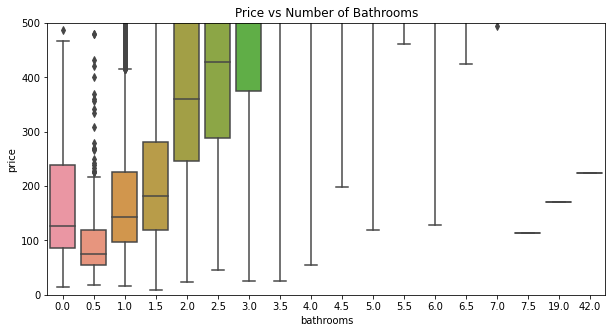

In [125]:
#Bathroom vs Price
plt.figure(figsize=(10, 5))
sns.boxplot(x='bathrooms', y='price', data=df_raw)
plt.title('Price vs Number of Bathrooms')
plt.ylim(0, 500)
plt.savefig('../images/plots/Bathrooms_vs_Price_Boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

Inshights:
- More bathrooms means have higher price listings.

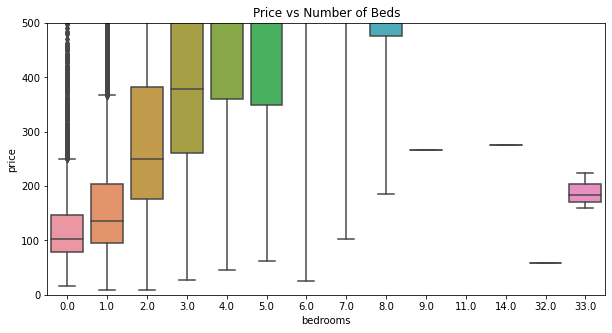

In [109]:
#Bedrooms v/s Price
plt.figure(figsize=(10, 5))
sns.boxplot(x='bedrooms', y='price', data=df_raw)
plt.title('Price vs Number of Beds')
plt.ylim(0, 500)
plt.show()

Inshights:
- 2-3 bedrooms have Price differnce.
- Price increases as the number of Bedrooms increases.

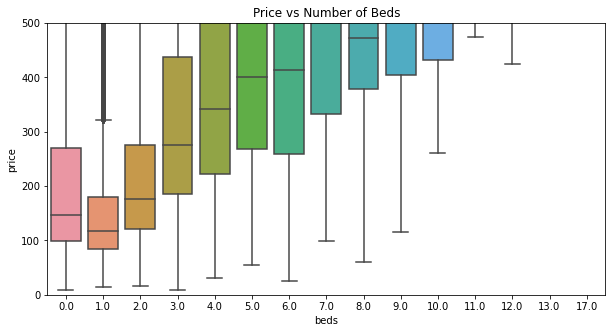

In [126]:
#Bed v/s Price
plt.figure(figsize=(10, 5))
sns.boxplot(x='beds', y='price', data=df_raw)
plt.title('Price vs Number of Beds')
plt.ylim(0, 500)
plt.savefig('../images/plots/Bed_vs_Price.png', dpi=300, bbox_inches='tight')
plt.show()

Inshights:
- More number of beds, more pricey the listing becomes.

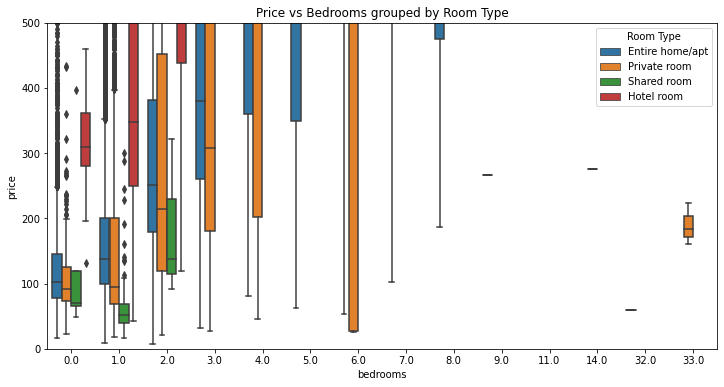

In [127]:
#Room Type and Bedroom v/s Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', hue='room_type', data=df_raw)
plt.title('Price vs Bedrooms grouped by Room Type')
plt.ylim(0, 500)
plt.legend(title='Room Type')
plt.savefig('../images/plots/Price_vs_Bedrooms_RoomType_Boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

Inshights:
- Hotels rooms have maximum 2 bedrooms and its pricier than other Room types.
- Private room becomes Pricey with increase in the number of bedrooms.
- Shared Rooms have average price for about 2 bedrooms.
- Entire home/Apt is the most luxorios and the Price increases with the count of number of bedrooms.

### Univariate and Bivariate Analysis of Review Scores Columns

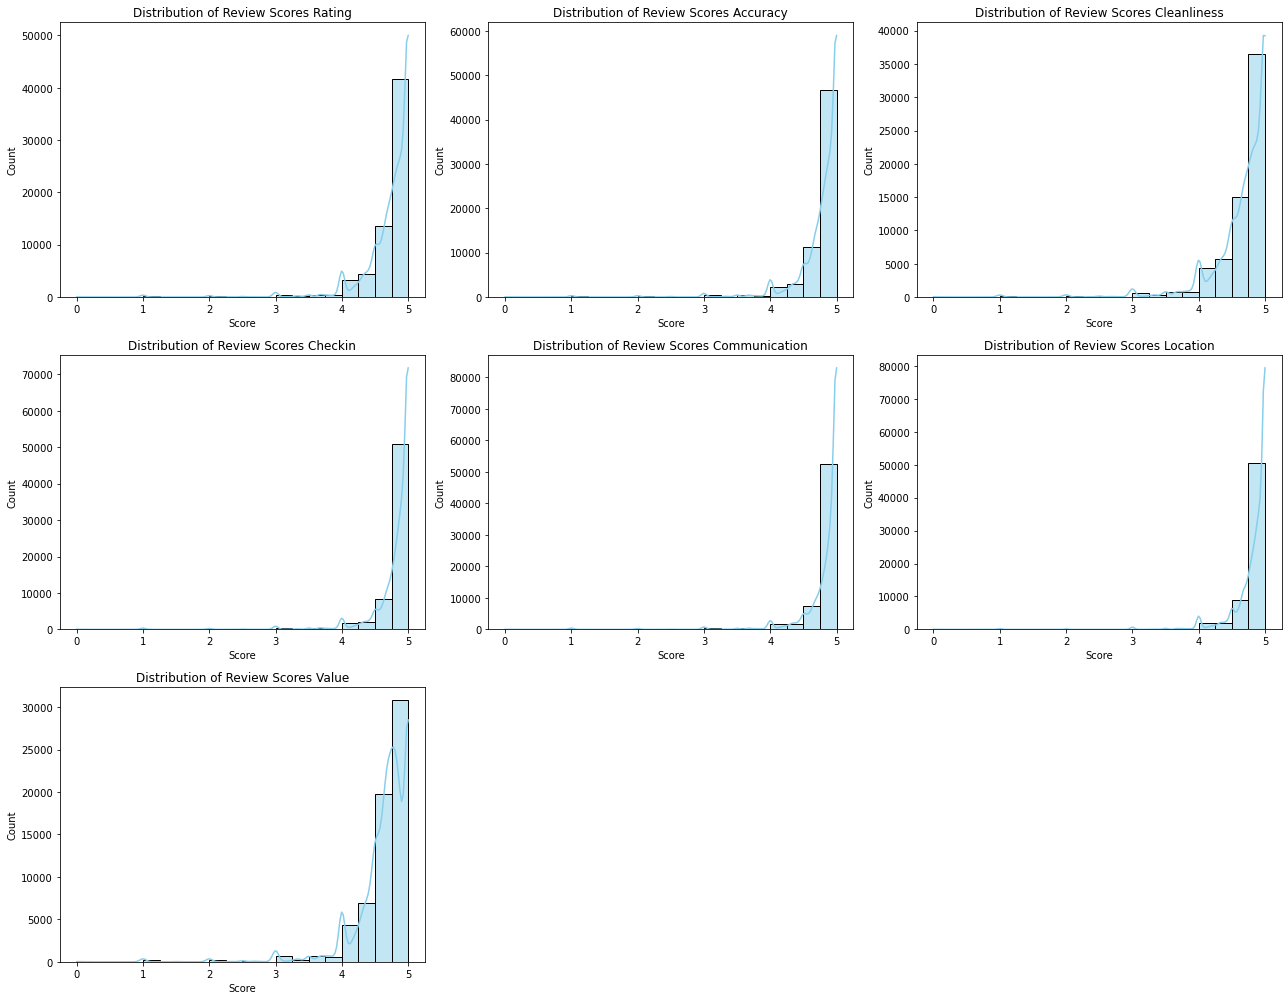

In [128]:
#Histogram Plot for Each Review Score Column
review_cols = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

plt.figure(figsize=(18, 14))
for i, col in enumerate(review_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel('Score')
    plt.ylabel('Count')

plt.tight_layout()
plt.savefig('../images/plots/Review_score_Hist.png', dpi=300, bbox_inches='tight')
plt.show()

Inshights:
- Almost all scores are left skewed.
- All scroes are concentrated between 3, 4 and 5.

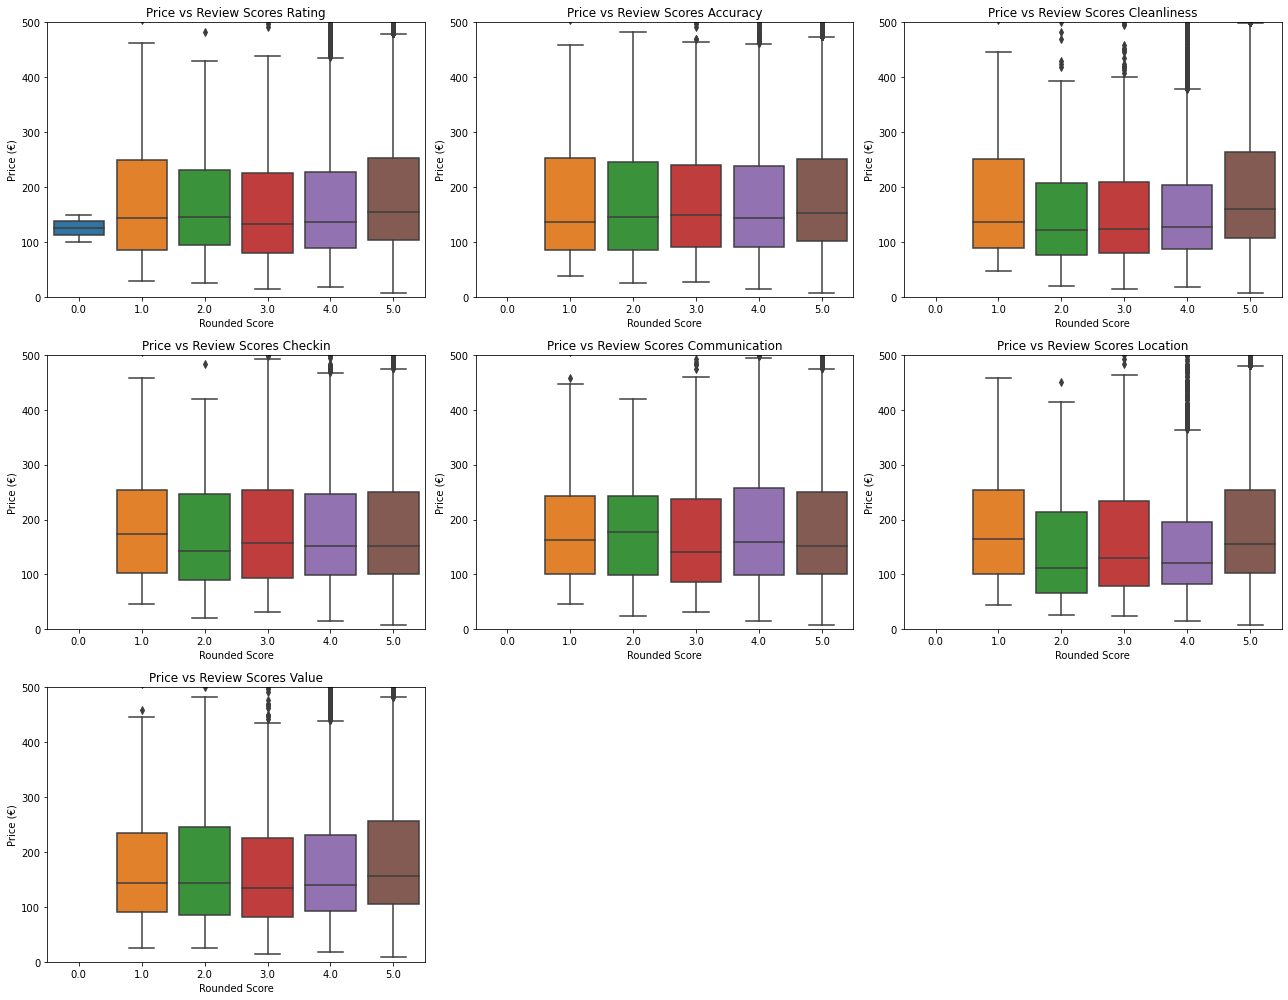

In [129]:
#Review Scores v/s Price
plt.figure(figsize=(18, 14))
for i, col in enumerate(review_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col].round(0), y=df_raw['price'])
    plt.ylim(0, 500)
    plt.title(f'Price vs {col.replace("_", " ").title()}')
    plt.xlabel('Rounded Score')
    plt.ylabel('Price (€)')

plt.tight_layout()
plt.savefig('../images/plots/Review_Scores_vs_Price_Boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

Inshights:
- Listings with same scores align with Price.

### Conclusion

1. Listing Trends:

   * Most listings accommodate 2–4 guests, have 1 bedroom, and 1 bathroom.

   * The majority of listings are entire homes/apartments, followed by private rooms.
   

2. Pricing Insights:

   * Prices are right-skewed with a majority of listings under €200.

   * Larger listings (more bedrooms, beds, bathrooms) command higher prices.
   

3. Neighborhood Analysis:

   * Top neighborhoods by listing count are centrally located and tourist-friendly.

   * Significant price variation exists across neighborhoods.
   

4. Review Score Patterns:

   * Most review scores cluster between 3 and 5, indicating general guest satisfaction.

   * Features like review_scores_cleanliness, communication, and location show a positive correlation with price,   suggesting higher-rated listings can charge more.

    * However, the influence of review scores on price is moderate, not dominant.
    
